### Домашнее задание к занятию "Оценка точности модели"

### Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

#### 1. Построим модель и получим предсказания

In [79]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [41]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [42]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [43]:
Y = data['affair']

In [44]:
model = LogisticRegression()

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [46]:
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
predictions = model.predict_proba(X_test)

In [53]:
predictions

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059868, 0.45940132],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [55]:
Y_hat = predictions[:,1]
Y_hat

array([0.62557513, 0.07476867, 0.31563037, ..., 0.45940132, 0.20209787,
       0.22715305])

#### 2. Построим ROC-кривую программным способом

In [142]:
from sklearn.metrics import roc_curve

In [143]:
fpr_, tpr_, thresholds_ = roc_curve(Y_test, Y_hat)

In [144]:
len(thresholds_)

846

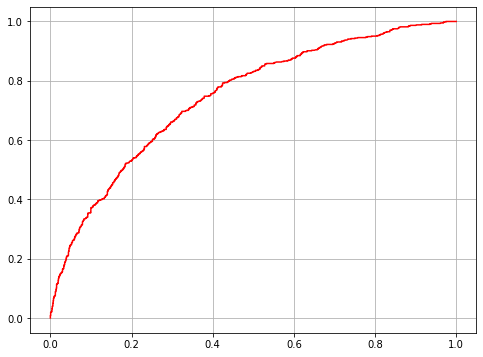

In [206]:
plt.figure(figsize=[8,6])
plt.plot(fpr_, tpr_, 'r')
plt.grid()

In [146]:
len(thresholds_)

846

#### 2. Расчитаем fpr и tpr без функции roc_curve¶

In [177]:
# Функция для определения fpr и tpr
def fpr_tpr_culc(y_test, y_hat, thres):
    # выполним классификацию вектора предсказанных значений для одного из пороговых значений
    out_vector = np.greater_equal(y_hat,thres).astype(int)
    # расчитаем fpr и tpr
    true_positive = np.equal(out_vector, 1) & np.equal(y_test, 1)
    false_positive = np.equal(out_vector, 1) & np.equal(y_test, 0)
    true_negative = np.equal(out_vector, 0) & np.equal(y_test, 0)
    false_negative = np.equal(out_vector, 0) & np.equal(y_test, 1)
    
    fpr = false_positive.sum()/(false_positive.sum()+true_negative.sum())
    tpr = true_positive.sum()/(true_positive.sum() + false_negative.sum())
    return fpr, tpr

In [178]:
# выведем значение для проверки
for line in zip(fpr_[100:101], tpr_[100:101], thresholds_[100:101]):
    print(line)

(0.05372217958557176, 0.25370675453047775, 0.5872751896755191)


In [179]:
fpr, tpr = fpr_tpr_culc(Y_test, Y_hat, 0.5872751896755191)
fpr, tpr 

(0.05372217958557176, 0.25370675453047775)

Вывод: Результат расчитанный вручную равен результату полученному при помощи функции roc_curve

#### 3. Построим ROC-кривую без функции roc_curve и выведем две кривые на одном графике¶

In [229]:
def fpr_tpr_metrics (y_test, y_hat, partitions):
    roc = np.array([])
    for i in range(partitions +1):
        fpr, tpr =  fpr_tpr_culc(y_test, y_hat, i/partitions)
        roc = np.append(roc,[fpr, tpr])
    return np.reshape(roc, (-1,2))    

In [230]:
roc = fpr_tpr_metrics(Y_test, Y_hat, 100)

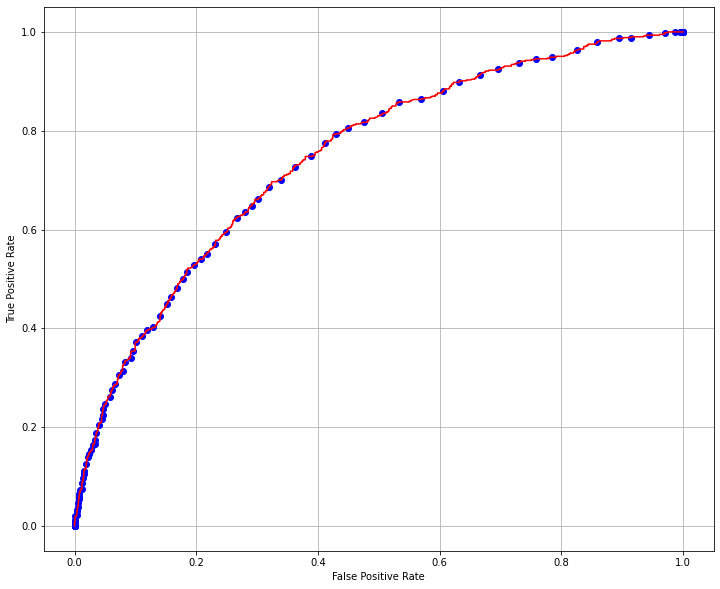

In [237]:
plt.figure(figsize=[12,10])
plt.plot(roc[:,0], roc[:,1], 'bo')
plt.plot(fpr_, tpr_, 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()